In [1]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [3]:
df_train = pd.read_csv("Titanic_test.csv")

In [4]:
print(df_train["Fare"].mean()) #Fare平均
print(df_train["Fare"].std()) #Fare標準差

35.6271884892086
55.90757617997383


In [5]:
 方法1 進行一個描述性的統計（規定範圍），從而檢視哪些值是不合理的（範圍以外的值）。
print(df_train["Fare"].describe())
np.where(df_train["Fare"]==0)

# 票價皆為正數，但票價為零有點不合理

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64


(array([266, 372], dtype=int64),)

In [7]:
方法 2
進行3倍標準差原則的計算，從而檢視哪些值是可疑的異常值

def outliers_z_score(ys,times):
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > times)

out_index=outliers_z_score(df_train['Fare'],3)
print(out_index[0])
print("票價位於三倍標準差外的值有哪些?")
print(df_train.loc[out_index[0],'Fare'])

[ 24  53  59  64  69  74  75  81 114 142 156 184 202 218 324 343 375 407]
票價位於三倍標準差外的值有哪些?
24     262.3750
53     263.0000
59     262.3750
64     262.3750
69     263.0000
74     211.5000
75     211.5000
81     221.7792
114    221.7792
142    262.3750
156    221.7792
184    247.5208
202    227.5250
218    211.5000
324    211.3375
343    512.3292
375    262.3750
407    211.5000
Name: Fare, dtype: float64


In [8]:
方法3-盒鬚圖判別法(IQR method)

def outliers_iqr(ys,times):
    quartile_1, quartile_3 = np.nanpercentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * times)
    upper_bound = quartile_3 + (iqr * times)
    return np.where((ys > upper_bound) | (ys < lower_bound))

out_index2=outliers_iqr(df_train["Fare"],2)
print(out_index2)
print("outlier有哪些?(2倍IQR)")
print(df_train.loc[out_index2[0],"Fare"])

(array([ 12,  24,  53,  59,  64,  69,  74,  75,  81,  96, 114, 141, 142,
       150, 156, 179, 181, 184, 196, 202, 217, 218, 239, 242, 252, 272,
       287, 293, 306, 308, 314, 316, 324, 327, 343, 371, 374, 375, 390,
       397, 400, 407, 411, 414], dtype=int64),)
outlier有哪些?(2倍IQR)
12      82.2667
24     262.3750
53     263.0000
59     262.3750
64     262.3750
69     263.0000
74     211.5000
75     211.5000
81     221.7792
96      78.8500
114    221.7792
141    151.5500
142    262.3750
150     83.1583
156    221.7792
179     83.1583
181     83.1583
184    247.5208
196    134.5000
202    227.5250
217    164.8667
218    211.5000
239    106.4250
242    134.5000
252    136.7792
272    136.7792
287     82.2667
293     81.8583
306    151.5500
308     93.5000
314    135.6333
316    146.5208
324    211.3375
327     79.2000
343    512.3292
371    134.5000
374     81.8583
375    262.3750
390     93.5000
397     79.2000
400    164.8667
407    211.5000
411     90.0000
414    108.9000
Name: Fare, 

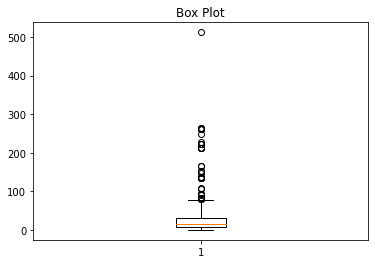

In [9]:
plt.boxplot(df_train['Fare'][~np.isnan(df_train['Fare'])],whis=2)    #作圖
plt.title('Box Plot')
plt.show()

In [10]:
#並不是，正常來說郵輪有艙等之分，方法一及方法二找出之異常直皆為票價過高的資料，但若核對這些高票價皆是一樣的艙位，則為正常現象不需做處理。

print(df_train.loc[out_index[0],"Pclass"])
#異常值之資料皆集中於艙等 1

或另一個想法是
不一定是真的異常值，可能會依艙等不同而有不同的票價，故需要額外資訊來輔助判斷。

24     1
53     1
59     1
64     1
69     1
74     1
75     1
81     1
114    1
142    1
156    1
184    1
202    1
218    1
324    1
343    1
375    1
407    1
Name: Pclass, dtype: int64
